In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


In [37]:
import numpy as np
import pandas as pd
import os
print(os.listdir(path))

['Mall_Customers.csv']


In [38]:
FILE=os.path.join(path,'Mall_Customers.csv')
data=pd.read_csv(FILE)
print(data)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [40]:
data_numeric=data.drop(columns=[ 'CustomerID','Gender'])

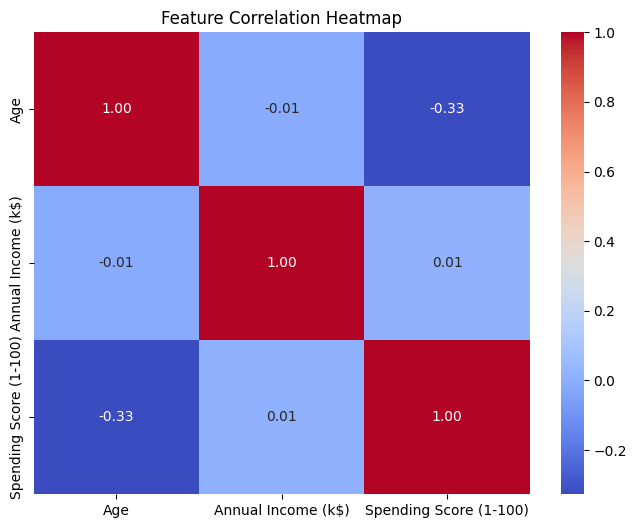

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(data_numeric.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

DESCRIPTION OF HEATMAP
Axes (rows & columns) → Features from your dataset:
Age
Annual Income (k$)
Spending Score (1-100)

Cell values → Pearson correlation coefficient between two features.

Range:
+1.00 → Perfect positive correlation (move together exactly)
0 → No correlation
-1.00 → Perfect negative correlation (move in opposite directions)

Colors:
Red → Positive correlation
Blue → Negative correlation
White/light colors → Weak or no correlation

Interpretation OF THE HEATMAP

1.Age vs Spending Score → -0.33
Moderate negative correlation:
As Age increases, Spending Score tends to decrease.
Younger customers tend to have higher spending scores.

2.Age vs Annual Income → -0.01
Almost no correlation:
Age doesn’t seem to influence income in this dataset.

3.Annual Income vs Spending Score → 0.01
Almost no correlation:
Income doesn’t directly determine the spending score here.

4.Diagonal cells (1.00)
A feature is perfectly correlated with itself (trivial).

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=['Age'  ,'Annual Income (k$)'  ,'Spending Score (1-100)']
data[cols]=scaler.fit_transform(data[cols])

K-MEANS

In [43]:
from sklearn.cluster import KMeans
x=data[cols]
y=data['Gender']
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
k_results=kmeans.fit_predict(x)

ELBOW METHOD - to find optimal number of K_cluisters

In [44]:
inertia=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i,init="k-means++",random_state=42)
    k_means.fit(x)
    inertia.append(k_means.inertia_)

PLOTTING ELBOW CURVE
(In KMeans clustering, inertia is a measure of how well the data points fit within their assigned clusters.)
(If points are close to their cluster center, inertia is low → better clustering.
If points are spread out, inertia is high → worse clustering.)

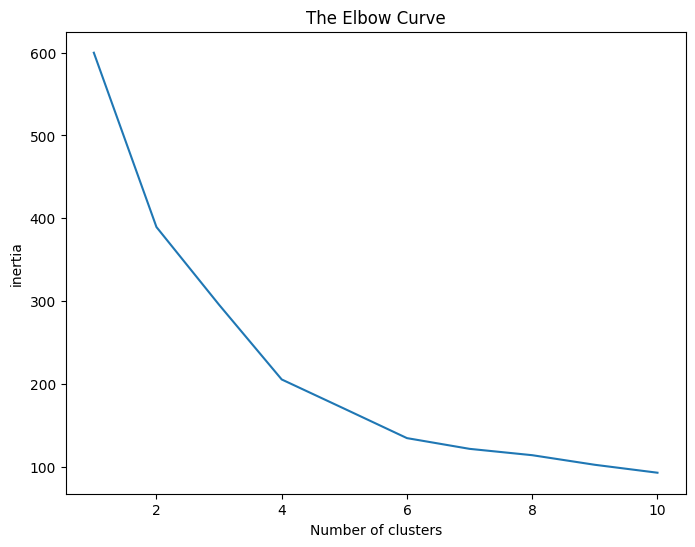

In [45]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),inertia)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.show()

1.From k=1 to k=4
Inertia drops sharply (600 → ~200).
This means each extra cluster is dramatically improving how close points are to their centroids.

2.From k=4 to k=6
Inertia still decreases, but the drop is much smaller (~200 → ~130).
This means the model is starting to over-partition the data — splitting clusters that were already fairly tight.

3.After k=6
The curve is almost flat.
Any drop in inertia is tiny, so more clusters just make the model more complex without much gain.

ACCORDING TO ABOVE EXPLANATION 4 OR 5 IS THE VALUE FOR OPTIMAL K.

Visualize clusters with color-coding

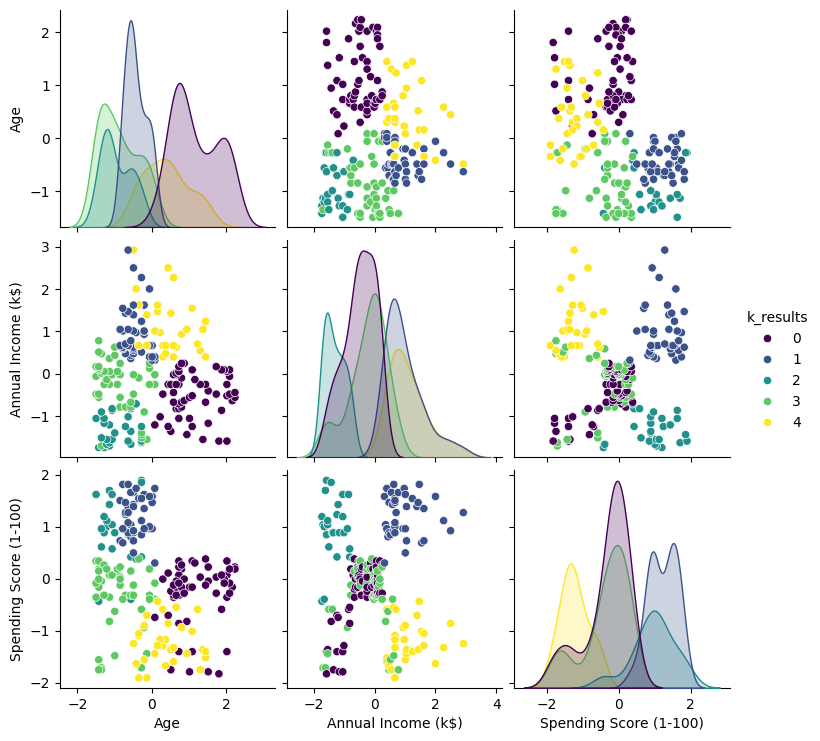

In [46]:
import seaborn as sns
data['k_results']=k_results

sns.pairplot(
    data,
    vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    hue='k_results',
    palette='viridis',
    diag_kind='kde'
)
plt.show()


This clustering diagram tells you-
How the clusters are distributed in different 2D projections (Age vs Income, Age vs Spending Score, etc.).
Rough overlap between clusters (if colors mix a lot, clusters aren’t well separated).
Shape and spread of clusters (some might be tight and compact, others stretched out).
Potential outliers (points far from the main groups).

Silhouette Score - The Silhouette Score is a metric used to measure how well your clustering worked — basically, it tells you how clearly separated and well-formed your clusters are.

Score range and meaning
+1 → Perfect clustering (well-separated clusters, far from each other)
0 → Overlapping clusters (points are on the boundary between clusters)
[A good silhouette score is usually > 0.5 (but it depends on the dataset).
compare scores for different k values and pick the k with the highest score.]
Negative → Wrong clustering (points are closer to other clusters than to their own)

In [47]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,k_results)
print('silhouette_score:',score)

silhouette_score: 0.40846873777345605
